### This is a study on data collected during a each batch of XRF runs

In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel('data/crm.xlsx')
df.columns =["sample","ni","fe","co","alu","sil","phos","sul","mag","cal","chrom","man","ti","dt","xrf", "note"]
#df.info()

In [3]:
imp = ["sample",'xrf',"ni","fe","alu","dt"]
crm = df[imp]
#crm["sample"] = crm["sample"].astype('str')
crm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22241 entries, 0 to 22240
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   sample  22241 non-null  object        
 1   xrf     22241 non-null  int64         
 2   ni      22241 non-null  float64       
 3   fe      22241 non-null  float64       
 4   alu     22238 non-null  float64       
 5   dt      22241 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 1.0+ MB


<AxesSubplot:>

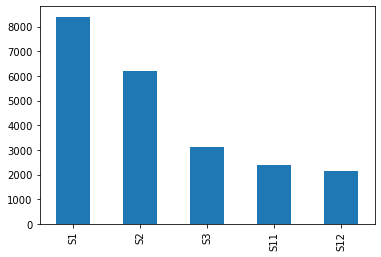

In [7]:
crm['sample'].value_counts().plot(kind="bar")

<AxesSubplot:>

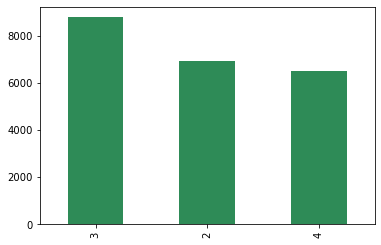

In [8]:
crm['xrf'].value_counts().plot(kind="bar", color="seagreen")

In [19]:
sample_unique=crm['sample'].unique()
elem = ["ni","fe","alu"]
sample_unique
elem

['ni', 'fe', 'alu']

#1.) Daily element trend for different XRFs
#2.) Did Fe trend change with time?


In [29]:
crm.groupby(["sample","xrf"])["ni"].agg([min,max,np.mean,np.median]).round(2)

min   max  mean  median
sample xrf                          
S1     2    0.07  0.67  0.64    0.64
       3    0.60  0.67  0.63    0.63
       4    0.59  0.65  0.63    0.63
S11    2    0.95  1.03  0.98    0.98
       3    0.98  1.02  1.00    1.00
       4    0.94  1.02  0.98    0.98
S12    2    1.24  1.42  1.37    1.38
       3    1.30  1.42  1.39    1.39
       4    1.26  1.42  1.37    1.37
S2     2    0.05  0.96  0.66    0.66
       3    0.62  0.70  0.64    0.64
       4    0.62  0.67  0.65    0.65
S3     2    0.04  1.06  1.01    1.02
       3    0.94  1.02  0.98    0.98
       4    0.66  1.01  0.99    0.99

In [22]:
crm.groupby(["sample","xrf"])[elem].median().round(2)

ni     fe    alu
sample xrf                    
S1     2    0.64  48.55   9.96
       3    0.63  48.35  10.03
       4    0.63  48.45   8.28
S11    2    0.98   8.14   1.73
       3    1.00   8.30   1.61
       4    0.98   7.85   1.05
S12    2    1.38  13.64   1.53
       3    1.39  13.96   1.35
       4    1.37  13.37   1.12
S2     2    0.66  51.53   6.64
       3    0.64  51.21   6.75
       4    0.65  51.80   6.62
S3     2    1.02  53.17   3.33
       3    0.98  52.91   3.38
       4    0.99  53.81   4.03

In [44]:
s1 = crm[crm['sample']=="S1"]
s1 = s1.set_index('dt')

In [46]:
#precip_2005_clean.resample("D").mean()
s1.resample("D").mean()

,xrf,ni,fe,alu
dt,,,,
2021-06-06,2.555556,0.638144,48.700000,10.582222
2021-06-07,NaN,NaN,NaN,NaN
2021-06-08,NaN,NaN,NaN,NaN
2021-06-09,NaN,NaN,NaN,NaN
2021-06-10,NaN,NaN,NaN,NaN
...,...,...,...,...
2022-11-17,2.500000,0.633600,48.092500,10.302500
2022-11-18,2.833333,0.632417,48.142500,9.469833
2022-11-19,3.068966,0.630572,48.234138,8.991690


In [47]:
s1.groupby("xrf")[elem].resample("D").mean()

ni         fe        alu
xrf dt                                        
2   2021-06-06  0.630350  48.212500  10.350000
    2021-06-07       NaN        NaN        NaN
    2021-06-08       NaN        NaN        NaN
    2021-06-09       NaN        NaN        NaN
    2021-06-10       NaN        NaN        NaN
...                  ...        ...        ...
4   2022-11-17       NaN        NaN        NaN
    2022-11-18  0.628200  48.025000   6.914500
    2022-11-19  0.623858  48.072500   7.167417
    2022-11-20  0.629710  47.994000   6.898200
    2022-11-21  0.627700  47.923333   6.896667

[1416 rows x 3 columns]

In [43]:
s1.groupby("xrf")[elem].resample("D").mean()c

,sample,xrf,ni,fe,alu,dt
0,S1,3,0.6344,48.71,10.25,2021-06-06 03:50:24.000
1,S1,3,0.6342,49.41,10.47,2021-06-06 09:21:36.000
2,S1,2,0.6303,48.10,10.17,2021-06-06 14:09:36.000
3,S1,2,0.6191,48.43,10.19,2021-06-06 16:17:36.960
4,S1,2,0.6384,48.03,10.46,2021-06-06 16:19:12.000


In [ ]:
crm = crm.set_index('dt')

In [59]:
fe_grouped = crm.groupby(["sample","xrf"])["fe"].resample('D').mean()

In [60]:
fe_grouped.dropna(how="all", inplace=True)

<AxesSubplot:xlabel='xrf,dt'>

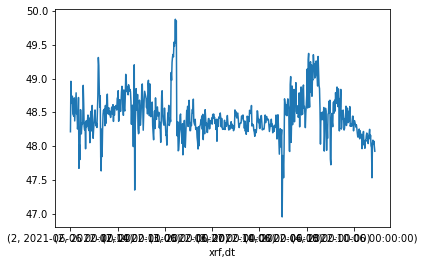

In [65]:
fe_grouped['S1'].plot()

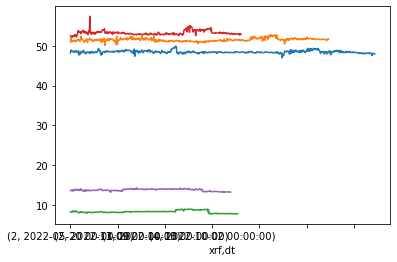

In [68]:
for sample in sample_unique:
    fe_grouped[sample].plot()

<AxesSubplot:xlabel='xrf,dt'>

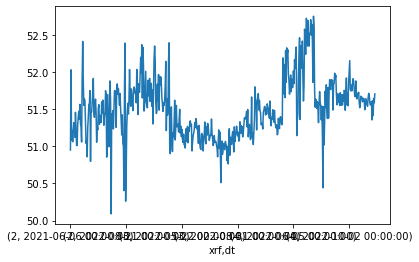

In [73]:
fe_grouped['S2'].plot()

<AxesSubplot:xlabel='xrf,dt'>

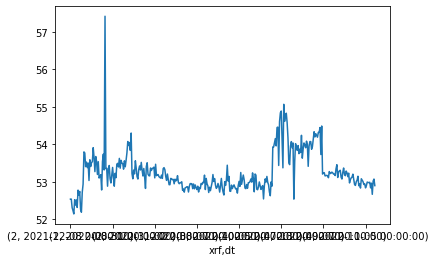

In [74]:
fe_grouped['S3'].plot()

<AxesSubplot:xlabel='xrf,dt'>

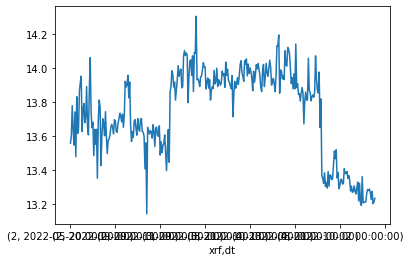

In [76]:
fe_grouped['S12'].plot()

In [79]:
fe_grouped.head()

sample  xrf  dt        
S1      2    2021-06-06    48.212500
             2021-06-30    48.960000
             2021-07-01    48.633333
             2021-07-02    48.635000
             2021-07-03    48.740000
Name: fe, dtype: float64

In [85]:
S1 = crm[crm["sample"]=="S1"]
S2 = crm[crm["sample"]=="S2"]
S3 = crm[crm["sample"]=="S3"]
S11 = crm[crm["sample"]=="S11"]
S12 = crm[crm["sample"]=="S12"]

<AxesSubplot:xlabel='dt'>

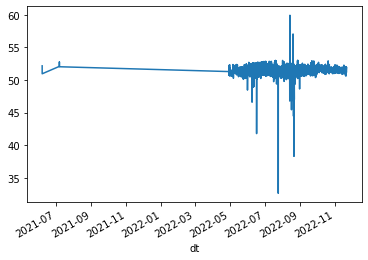

In [89]:
S2['fe'].plot()